завдання (1)

In [119]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')


In [120]:

customer_set = pd.read_csv('./Mall_Customers.csv', sep=',')
customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

customer_set_copy = customer_set.copy()
customer_set_copy['GrowthPotentialIndex'] = (customer_set_copy['Income'] / customer_set_copy['SpendingScore']) * 100
print('customer_set_copy', customer_set_copy)


customer_set_copy      CustomerID  Gender  Age  Income  SpendingScore  GrowthPotentialIndex
0             1    Male   19      15             39             38.461538
1             2    Male   21      15             81             18.518519
2             3  Female   20      16              6            266.666667
3             4  Female   23      16             77             20.779221
4             5  Female   31      17             40             42.500000
..          ...     ...  ...     ...            ...                   ...
195         196  Female   35     120             79            151.898734
196         197  Female   45     126             28            450.000000
197         198    Male   32     126             74            170.270270
198         199    Male   32     137             18            761.111111
199         200    Male   30     137             83            165.060241

[200 rows x 6 columns]


завдання 1


In [121]:

print("Основна статистична інформація:")
stats = customer_set.describe()
print(stats, "\n")

print("Максимальні значення по стовпцям:")
for col in customer_set.select_dtypes(include=[np.number]).columns:
    print(f"{col}: {customer_set[col].max()}")
print("\n")

print("Мінімальні значення по стовпцям:")
for col in customer_set.select_dtypes(include=[np.number]).columns:
    print(f"{col}: {customer_set[col].min()}")
print("\n")

print("Розмірність датасету:")
shape = customer_set.shape
print(f"Кількість рядків: {shape[0]}, Кількість стовпців: {shape[1]}")



Основна статистична інформація:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000 

Максимальні значення по стовпцям:
CustomerID: 200
Age: 70
Income: 137
SpendingScore: 99


Мінімальні значення по стовпцям:
CustomerID: 1
Age: 18
Income: 15
SpendingScore: 1


Розмірність датасету:
Кількість рядків: 200, Кількість стовпців: 5


завдаеея (2)

In [122]:
if 'CustomerID' in customer_set.columns:
    customer_set.drop(columns=['CustomerID'], inplace=True)
else:
    print("Колонка 'CustomerID' вже була видалена або не існує.")


завдання (3)

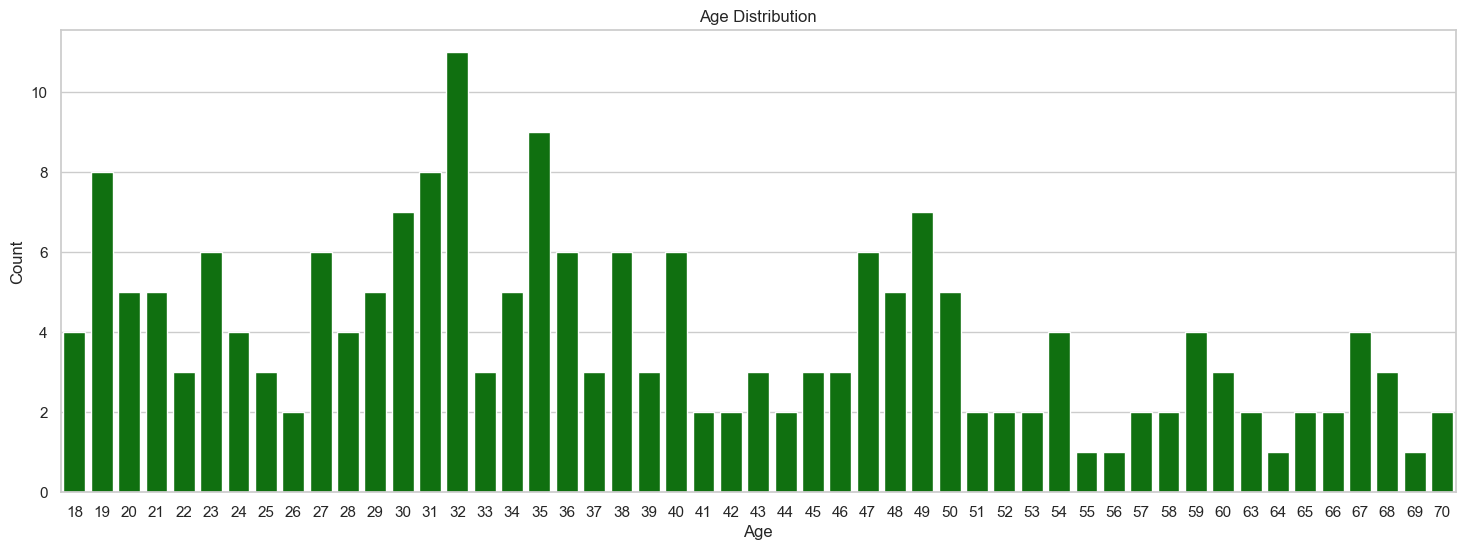

Unique counts for Age:
Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64



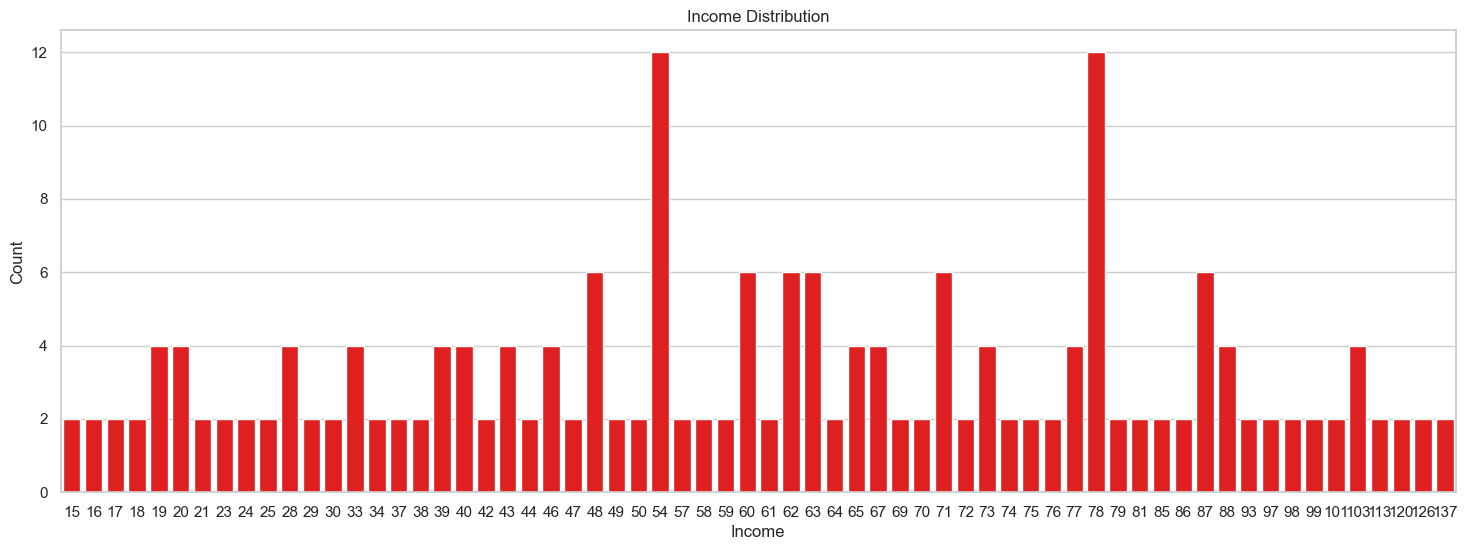

Unique counts for Income:
Income
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64



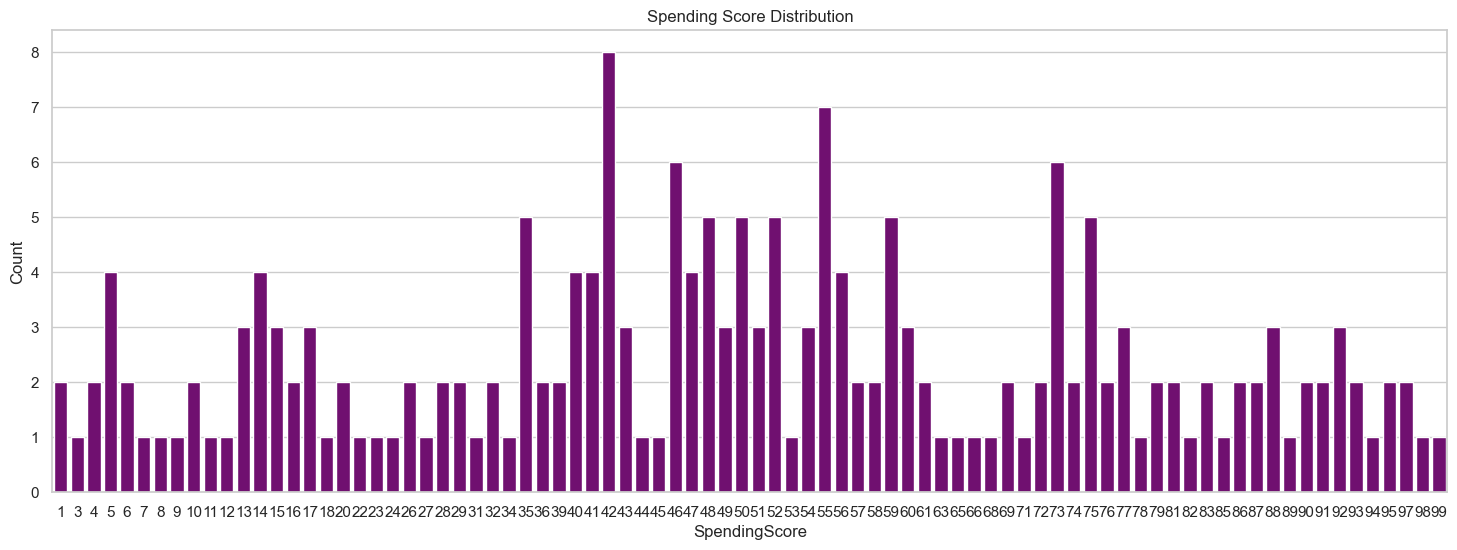

Unique counts for SpendingScore:
SpendingScore
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64



In [123]:
def custom_countplot(data, column_name, fig_size=(18, 6), color='blue', title=None):
    if title is None:
        title = f'Distribution of {column_name}'
    
    plt.figure(figsize=fig_size)
    sns.countplot(x=column_name, data=data, color=color)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

    unique_counts = data[column_name].value_counts()
    print(f"Unique counts for {column_name}:\n{unique_counts}\n")
custom_countplot(customer_set, 'Age', color='green', title='Age Distribution')
custom_countplot(customer_set, 'Income', color='red', title='Income Distribution')
custom_countplot(customer_set, 'SpendingScore', color='purple', title='Spending Score Distribution')



завдання (4)

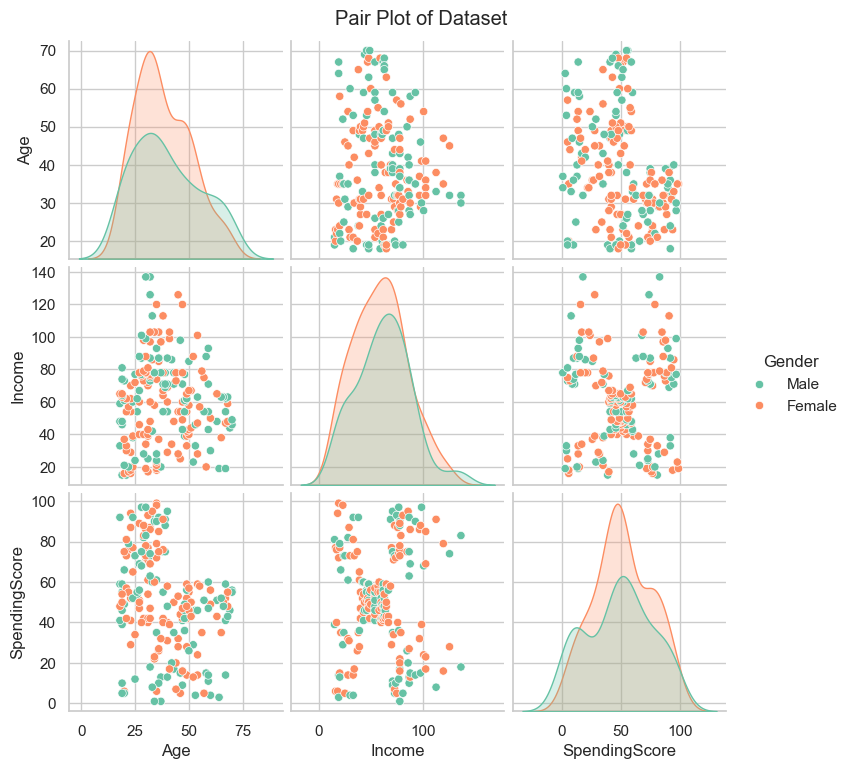

In [124]:
def custom_pairplot(data, group_by, palette='Set2'):
   
    pairplot = sns.pairplot(data=data, hue=group_by, palette=palette, diag_kind='kde')
    pairplot.fig.suptitle('Pair Plot of Dataset', y=1.02)  
    plt.show()
custom_pairplot(customer_set, 'Gender')



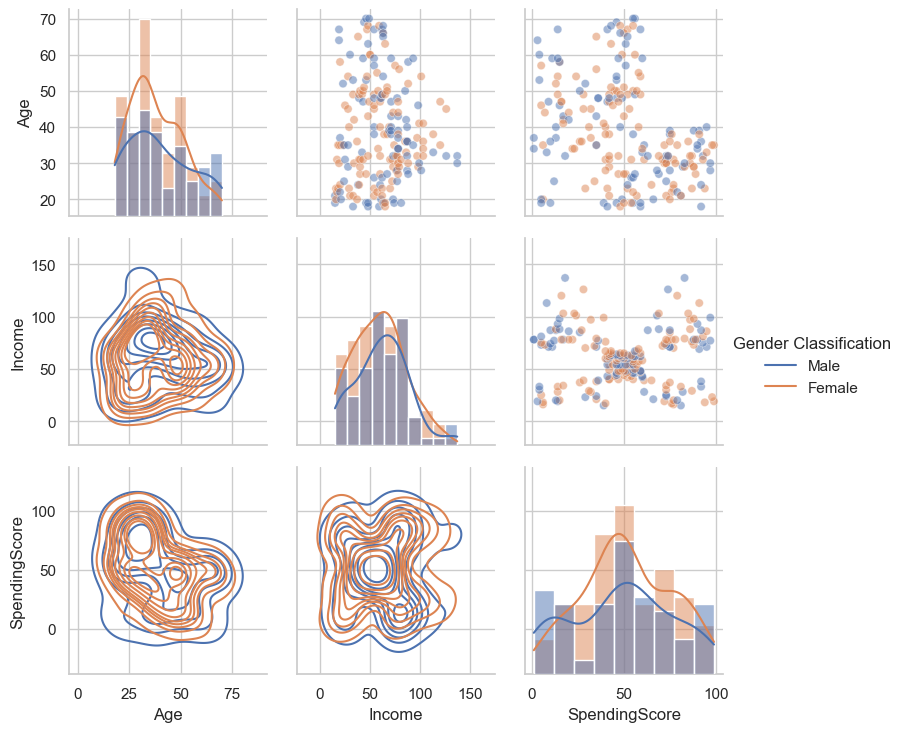

In [125]:
def display_pairwise_data(data_frame, category):
    """
    Creates customized pairwise plots with specific characteristics from a given dataset.

    :param data_frame: pandas DataFrame containing the dataset for visualization.
    :param category: str, name of the column in the DataFrame used for categorical coloring.
    """
    
    grid = sns.PairGrid(data_frame, hue=category)
    grid.map_upper(sns.scatterplot, alpha=0.5)  
    grid.map_diag(sns.histplot, kde=True)      
    grid.map_lower(sns.kdeplot, color='darkblue') 
    grid.add_legend(title=category + ' Classification')
    plt.show()
display_pairwise_data(customer_set, 'Gender')



1) Розмір датасету складає всього 200 рядків і 5 колонок.
2) Колонку "customerid" було видалено, оскільки вона не має впливу на аналіз.
3) Найбільше людей у датасеті мають вік 32 роки.
4) За допомогою графіків можна виявити 5 скупчень точок. Можна припустити, що оптимальною кількістю кластерів є 5.

завдання (5)

Співвідношення по статям:
Gender
Female    112
Male       88
Name: count, dtype: int64


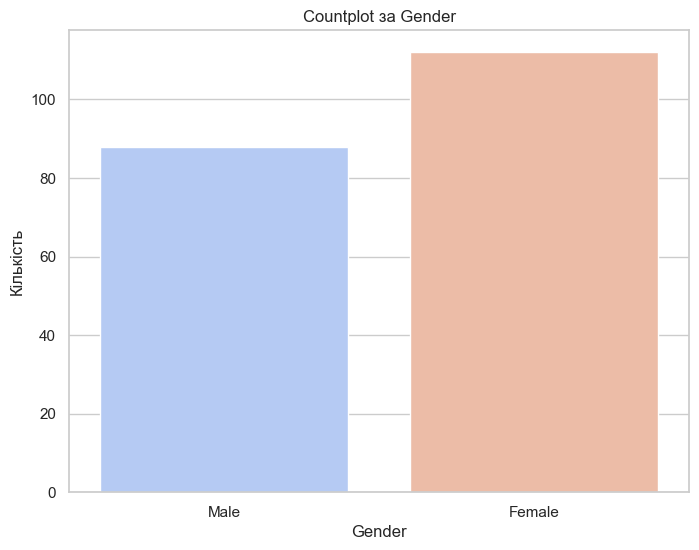

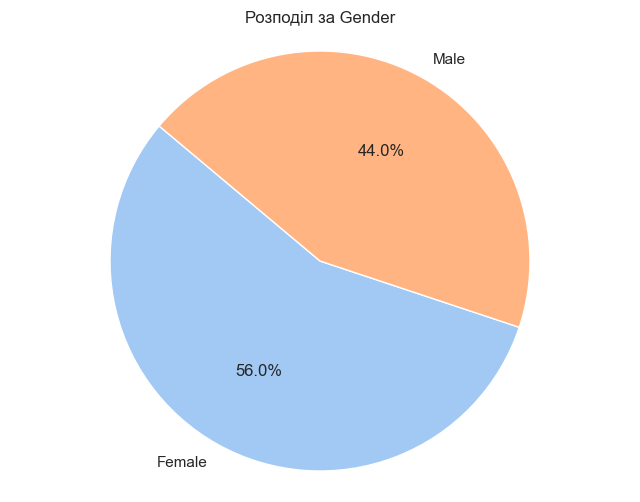

In [126]:
def plot_gender_distribution(data):
    sns.set(style="whitegrid")

    gender_counts = data['Gender'].value_counts()
    print("Співвідношення по статям:")
    print(gender_counts)

    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Gender', palette='coolwarm')
    plt.title('Countplot за Gender')
    plt.xlabel('Gender')
    plt.ylabel('Кількість')
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Розподіл за Gender')
    plt.axis('equal') 
    plt.show()

plot_gender_distribution(customer_set)



завдання (6)

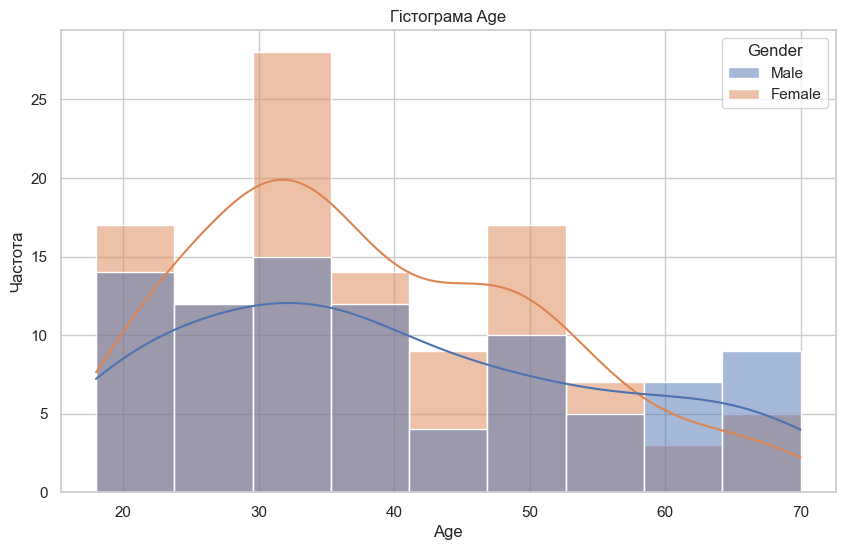

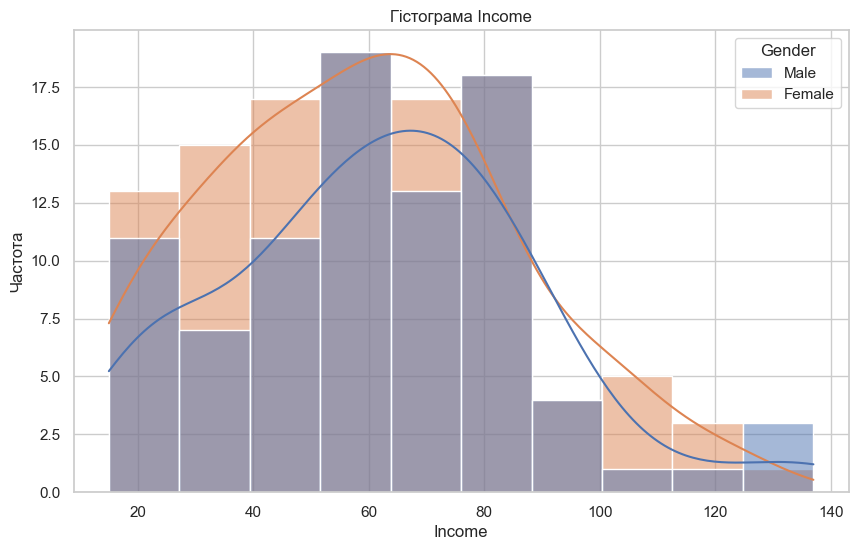

In [127]:
def plot_hist(data, column, hue, multiple, kde, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue=hue, multiple=multiple, kde=kde)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_hist(customer_set, 'Age', 'Gender', 'layer', True, 'Гістограма Age', 'Age', 'Частота')
plot_hist(customer_set, 'Income', 'Gender', 'layer', True, 'Гістограма Income', 'Income', 'Частота')


завдання (7)

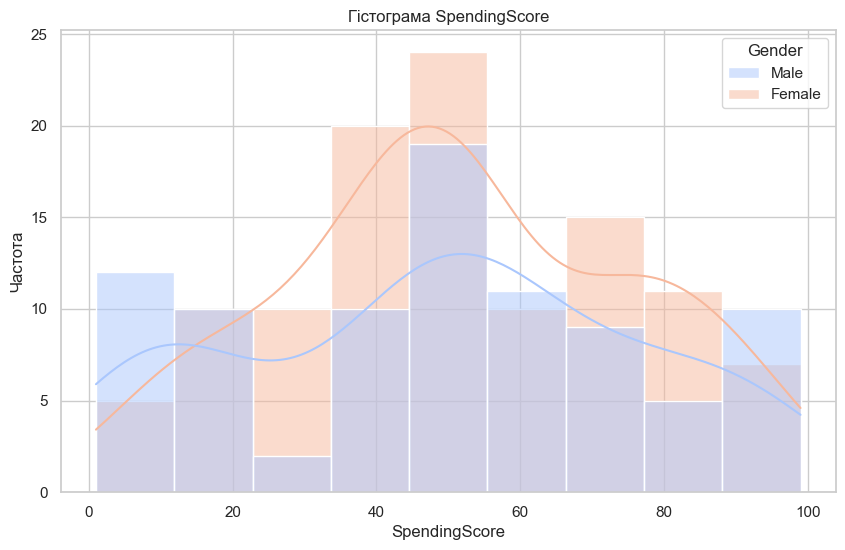

In [128]:
def plot_custom_hist(data, column, hue, multiple, kde, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue=hue, multiple=multiple, kde=kde, palette='coolwarm')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_custom_hist(
    data=customer_set,
    column='SpendingScore',
    hue='Gender',
    multiple='layer',
    kde=True,
    title='Гістограма SpendingScore',
    xlabel='SpendingScore',
    ylabel='Частота'
)



завдання (8)

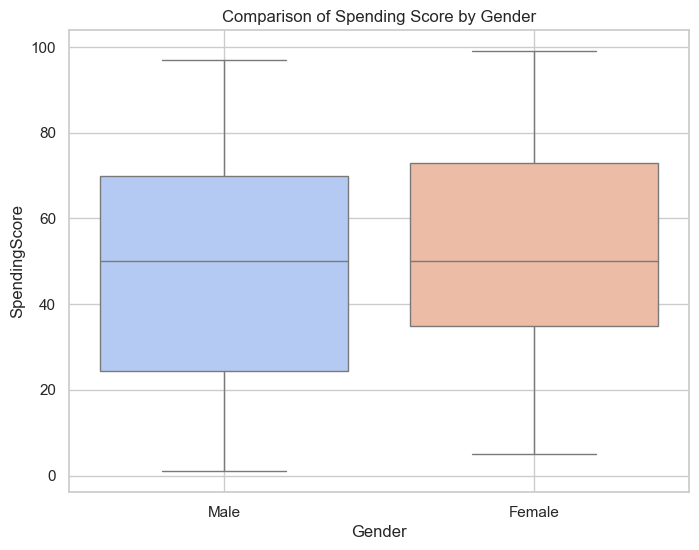

In [129]:
def plot_box(data, x_label, y_label, plot_title, palette='pastel'):
    plt.figure(figsize=(8, 6)) 
    sns.boxplot(x=x_label, y=y_label, data=data, palette=palette)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)  
    plt.show()

plot_box(customer_set, 'Gender', 'SpendingScore', 'Comparison of Spending Score by Gender', palette='coolwarm')




1) Співвідношення груп чоловіків і жінок становить 44% до 56% від загального обсягу.
2) При аналізі можна виділити групи та встановити, що жінки в середньому витрачають більше, ніж чоловіки. Це особливо стосується осіб з показником "spendingscore" в діапазоні від 20 до 55 або від 70 до 90.
3) Виявлено, що існує різниця у витратах між чоловіками та жінками. У середньому жінки витрачають більше, ніж чоловіки, особливо коли "spendingscore" знаходиться в діапазоні

завдання (9)

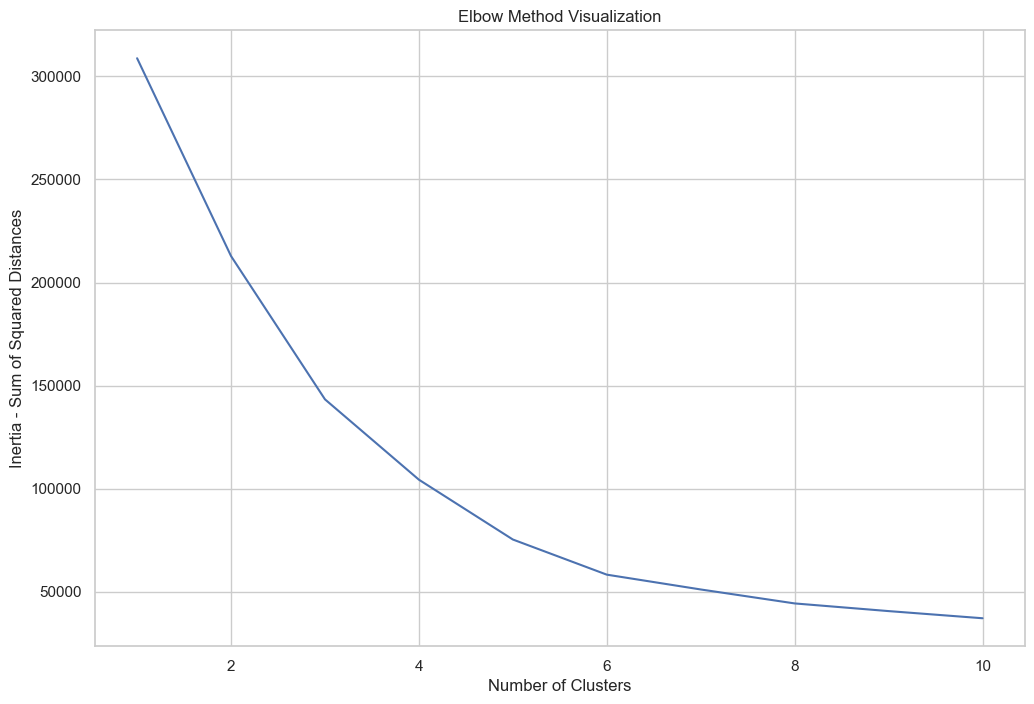

In [130]:
data_for_clustering = customer_set.drop(columns=['Gender'])
inertia_values = []
cluster_range = range(1, 11)

for cluster_count in cluster_range:
    kmeans = KMeans(n_clusters=cluster_count, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_for_clustering)
    inertia_values.append(kmeans.inertia_)

fig, plot_axis = plt.subplots(figsize=(12, 8))
viz.lineplot(x=list(cluster_range), y=inertia_values, ax=plot_axis)
plot_axis.set_title('Elbow Method Visualization')
plot_axis.set_xlabel('Number of Clusters')
plot_axis.set_ylabel('Inertia - Sum of Squared Distances')
plt.show()



Необхідно визначити оптимальну кількість кластерів на вашу думку (краще розглянути гіпотези щодо кількості кластерів для порівняння). За даними графіка, найкраща кількість кластерів - 3, 5 і 6. Далі я розгляну 5 і 6.

завдання (10)

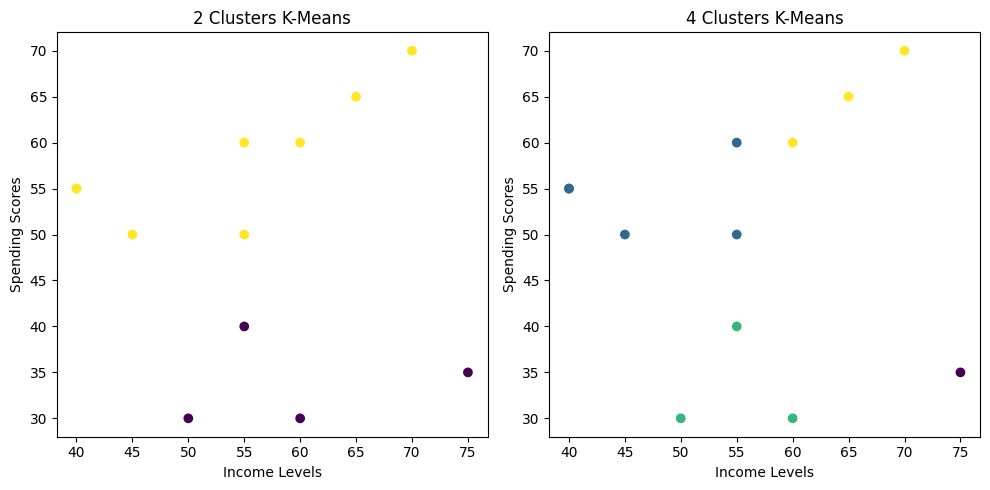

In [53]:
data = {
    'Income': [50, 60, 40, 55, 65, 70, 75, 40, 55, 60, 45, 55],
    'SpendingScore': [30, 60, 55, 40, 65, 70, 35, 55, 50, 30, 50, 60]
}
X = pd.DataFrame(data)
clusters = [2, 4]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for index, axis in enumerate(axes):
    kmeans_model = KMeans(n_clusters=clusters[index], init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans_model.fit_predict(X[['Income', 'SpendingScore']])
    axis.scatter(X['Income'], X['SpendingScore'], c=labels, cmap='viridis')
    axis.set_title(f'{clusters[index]} Clusters K-Means')
    axis.set_xlabel('Income Levels')
    axis.set_ylabel('Spending Scores')
plt.tight_layout()
plt.show()



завдання (11)

In [55]:
import plotly.io as pio
pio.renderers.default = 'browser'
clusters_options = [2, 4]
for idx in range(len(clusters_options)):
    cluster_count = clusters_options[idx]
    kmeans_algo = KMeans(n_clusters=cluster_count, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans_algo.fit_predict(X[['Income', 'SpendingScore']])
    
    X['AssignedCluster'] = cluster_labels
    three_d_plot = px.scatter_3d(X, x='Income', y='SpendingScore', z='AssignedCluster', color='AssignedCluster')
    three_d_plot.update_layout(title=f'Visualization with {cluster_count} Clusters')
    three_d_plot.show()


На основі отриманих візуалізацій, будь ласка, визначте оптимальну кількість кластерів на ваш погляд та проаналізуйте отримані кластери. З візуалізацій я можу зробити висновок, що оптимальна кількість кластерів - 5.

завдання (12)

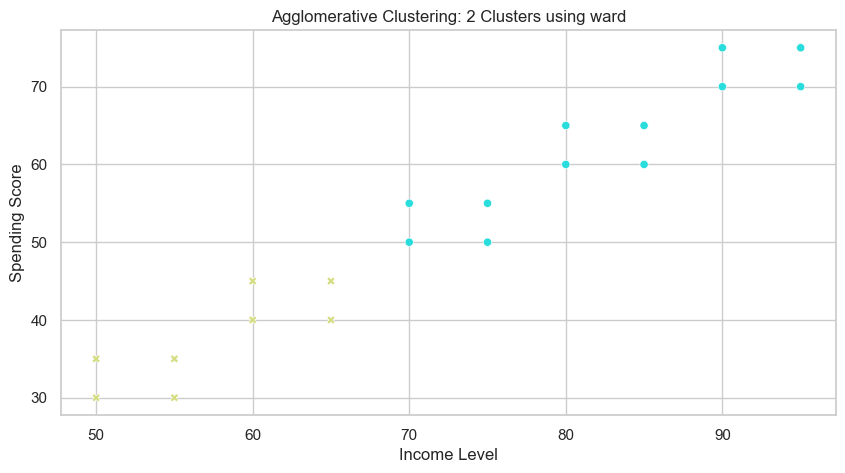

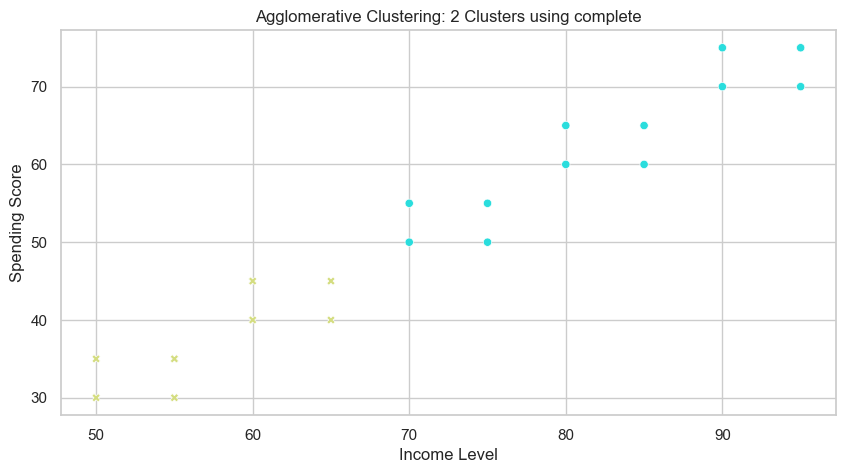

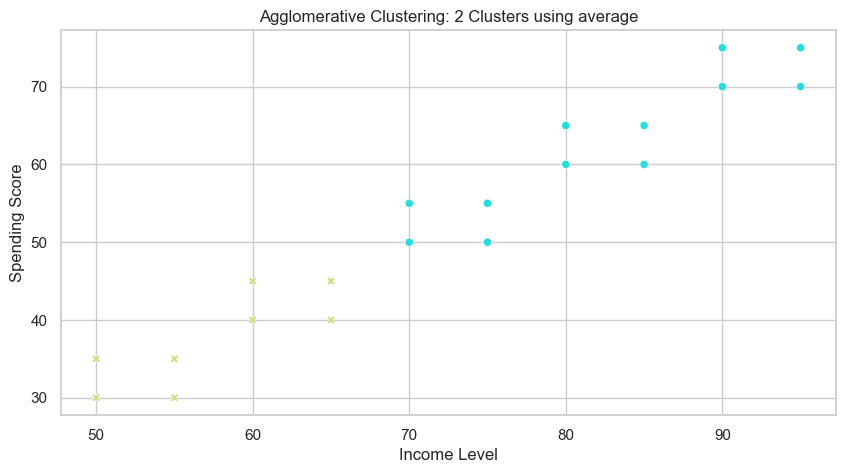

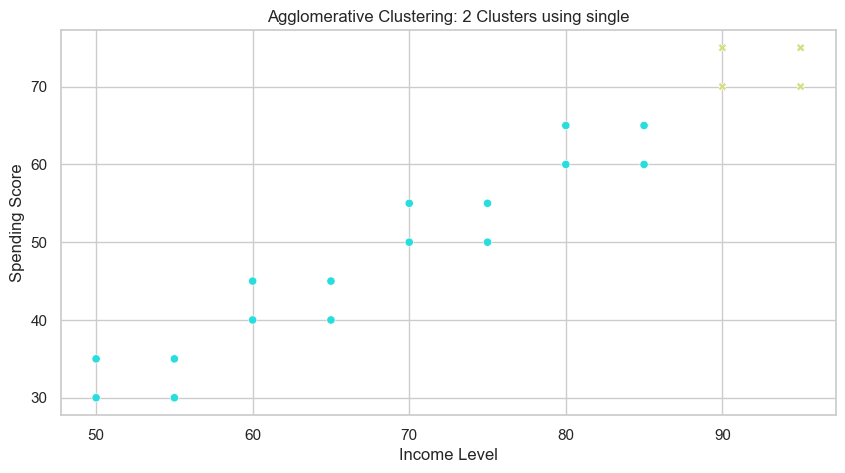

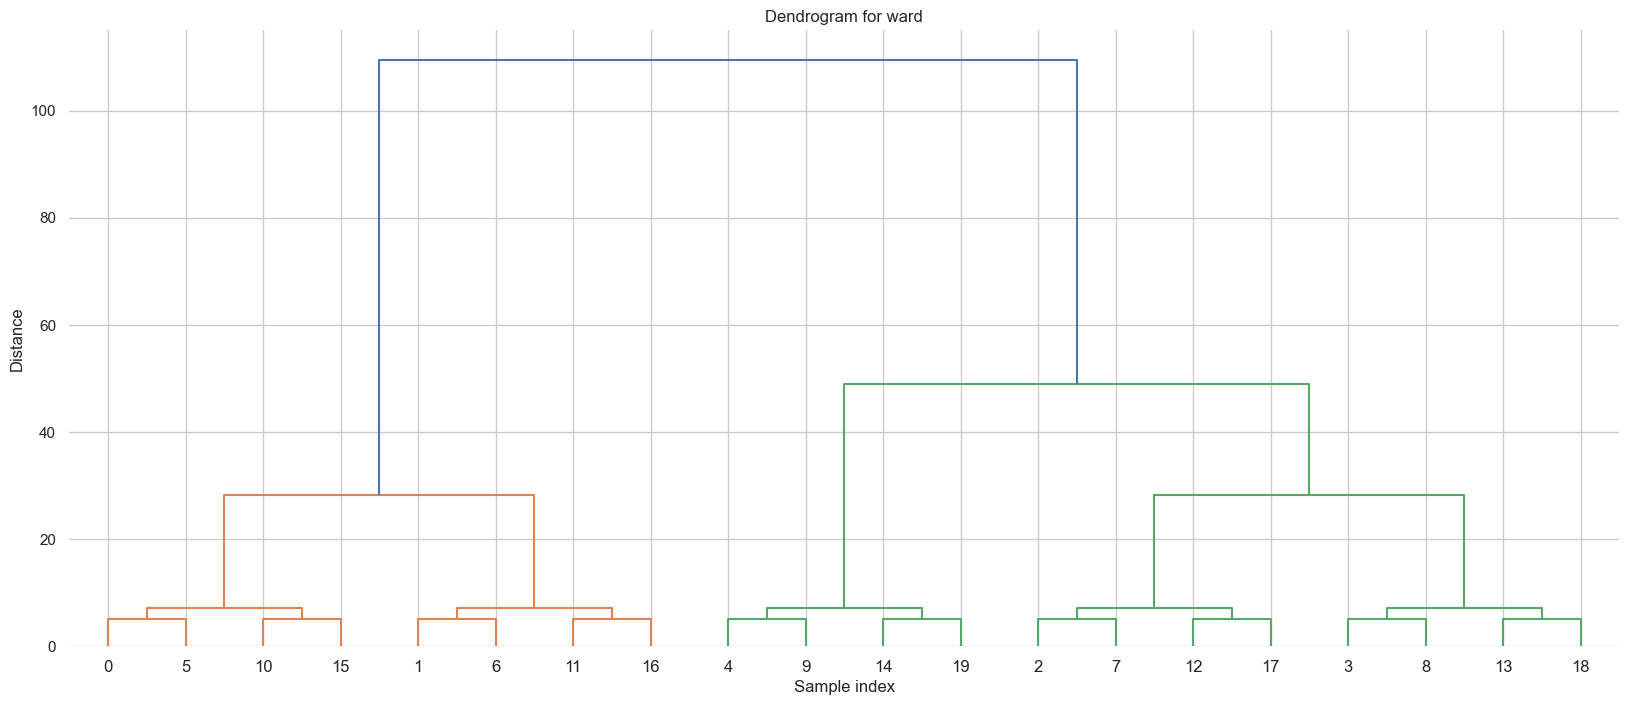

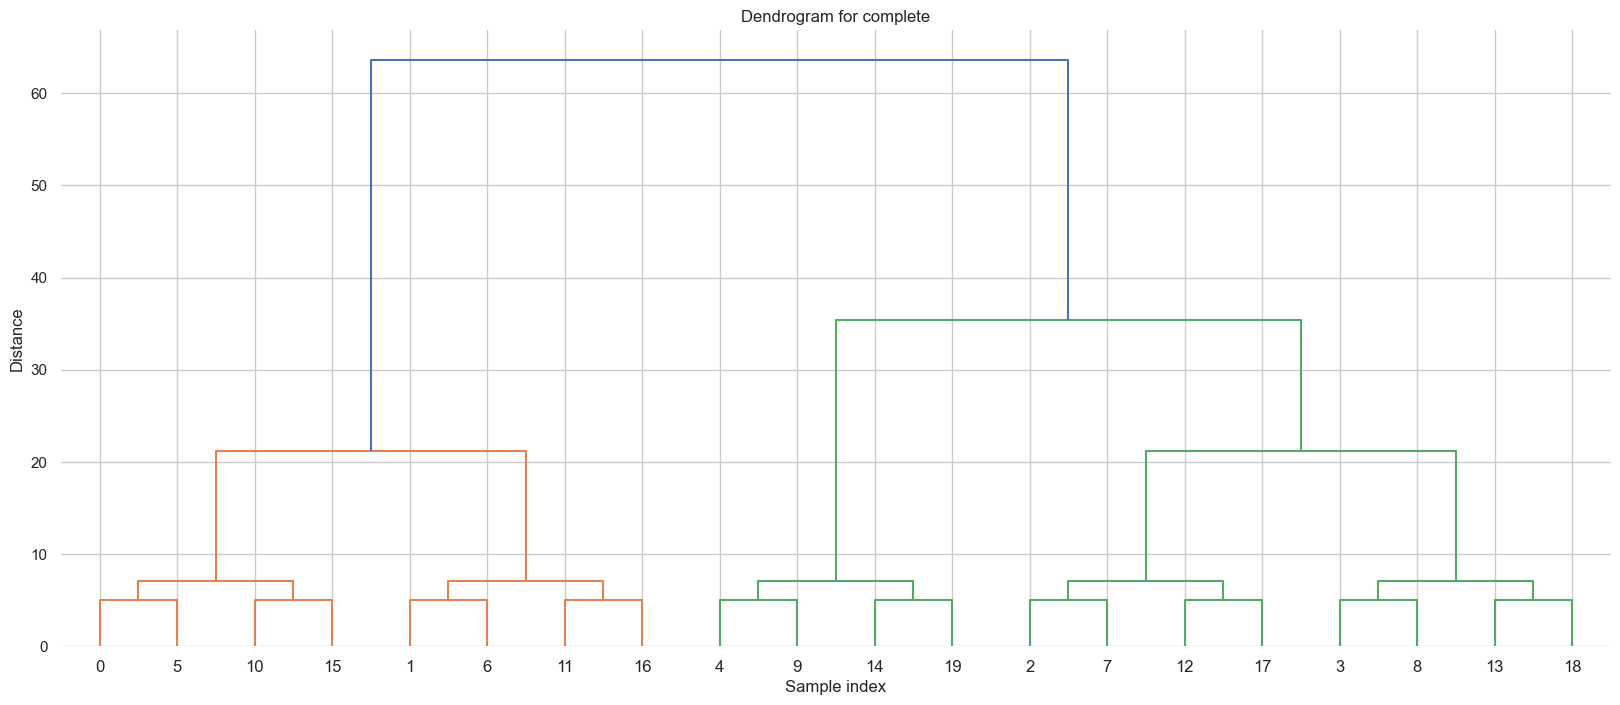

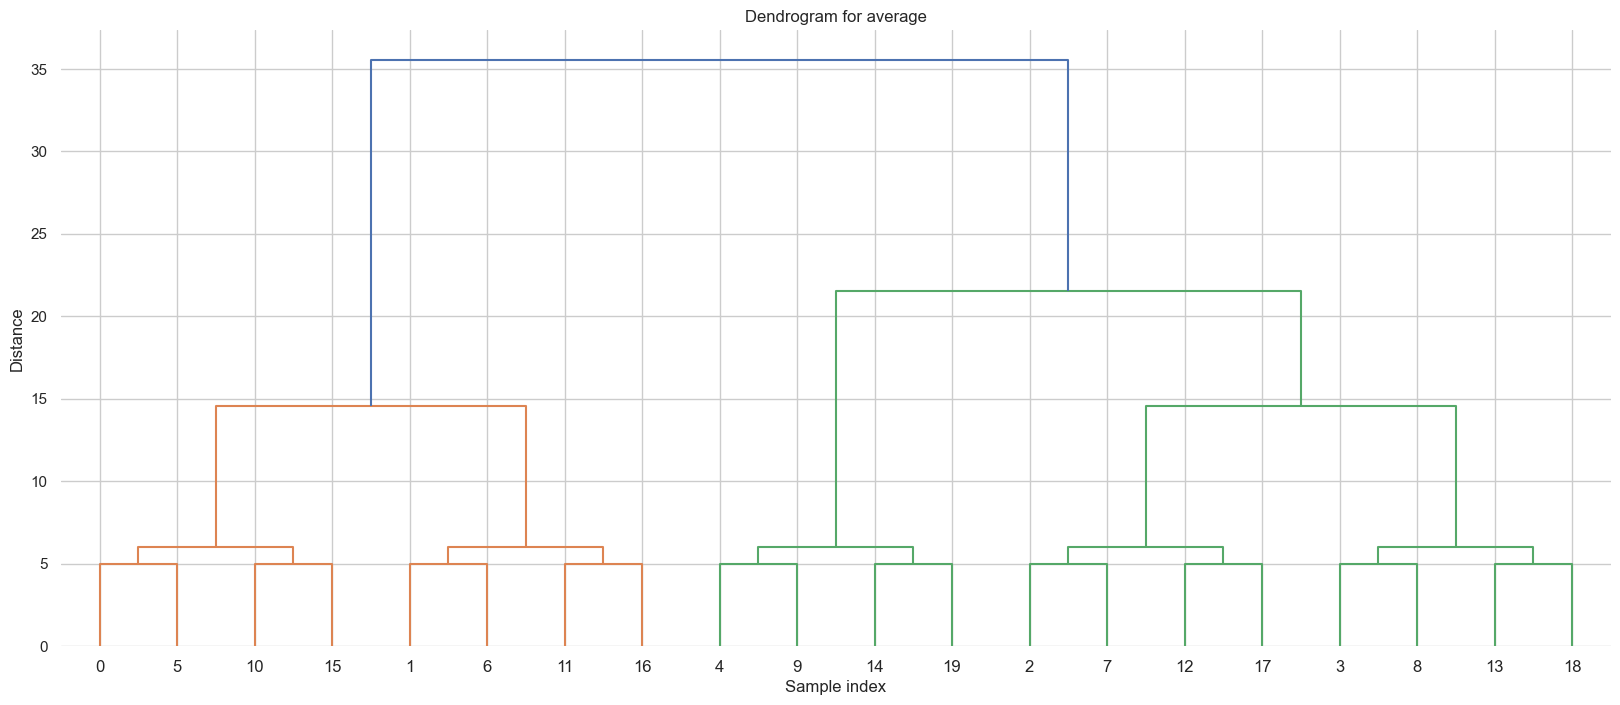

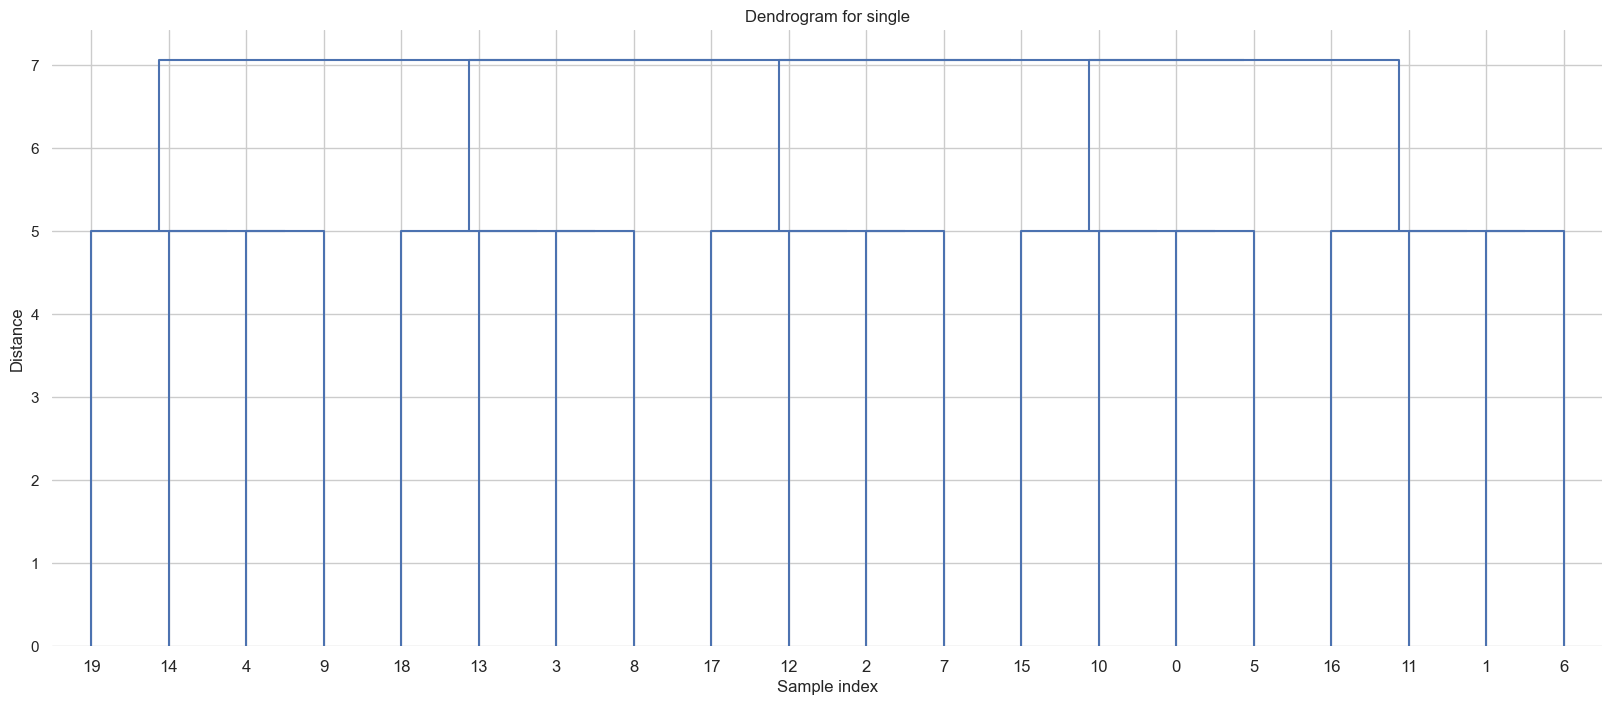

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

data = {
    'Income': [50, 60, 70, 80, 90, 55, 65, 75, 85, 95, 50, 60, 70, 80, 90, 55, 65, 75, 85, 95],
    'SpendingScore': [30, 40, 50, 60, 70, 30, 40, 50, 60, 70, 35, 45, 55, 65, 75, 35, 45, 55, 65, 75]
}
X = pd.DataFrame(data)
num_clusters = 2

linkage_types = ['ward', 'complete', 'average', 'single']
sns.set(style="whitegrid")

for linkage_type in linkage_types:
    agglom_model = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage_type)
    labels = agglom_model.fit_predict(X)
 
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='Income', y='SpendingScore', hue=labels, palette='rainbow', data=X, style=labels, markers=True, legend=None)
    plt.title(f'Agglomerative Clustering: {num_clusters} Clusters using {linkage_type}')
    plt.xlabel('Income Level')
    plt.ylabel('Spending Score')
    plt.show()

for method in linkage_types:
    linkage_data = hierarchy.linkage(X, method=method)
    
    plt.figure(figsize=(20, 8))
    dendrogram = hierarchy.dendrogram(linkage_data)
    plt.title(f'Dendrogram for {method}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    sns.despine(left=True, bottom=True) 
    plt.show()




комент

завдання (13)

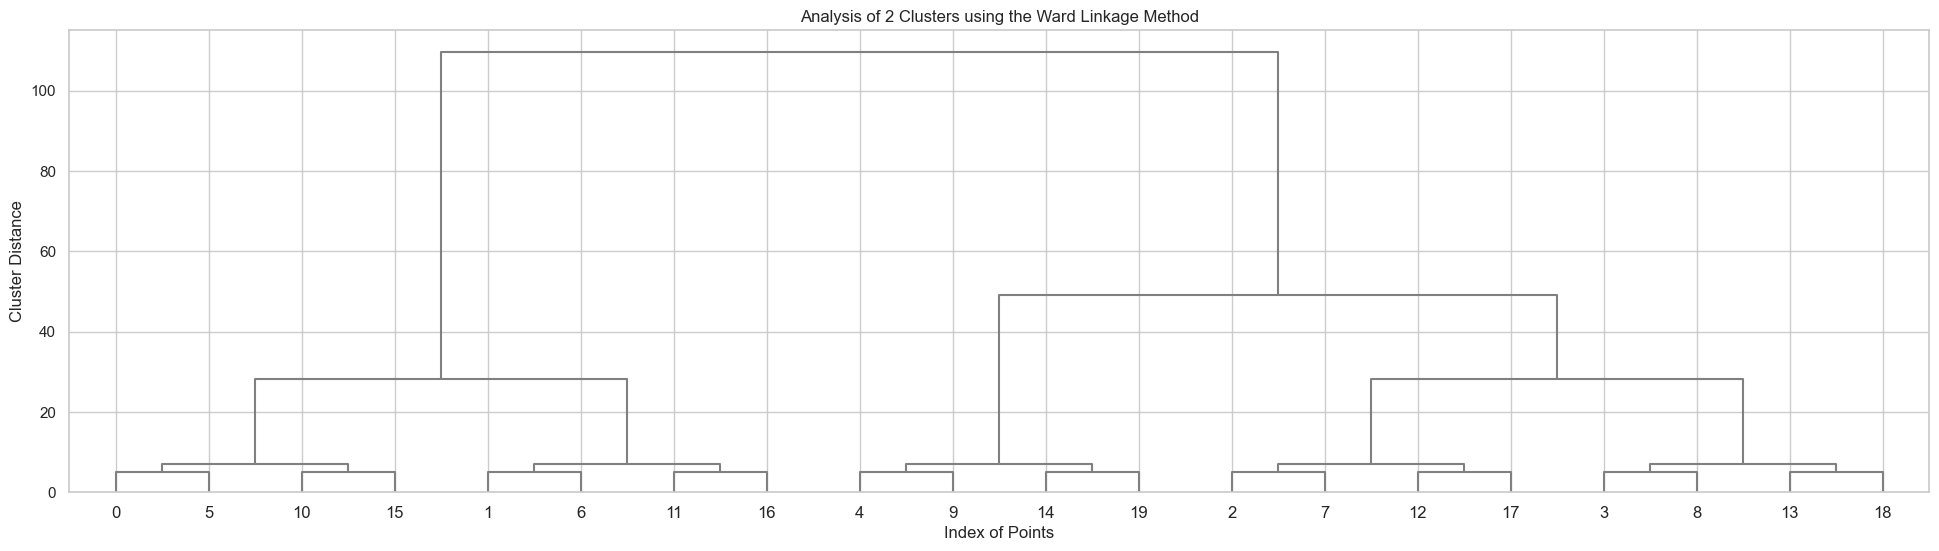

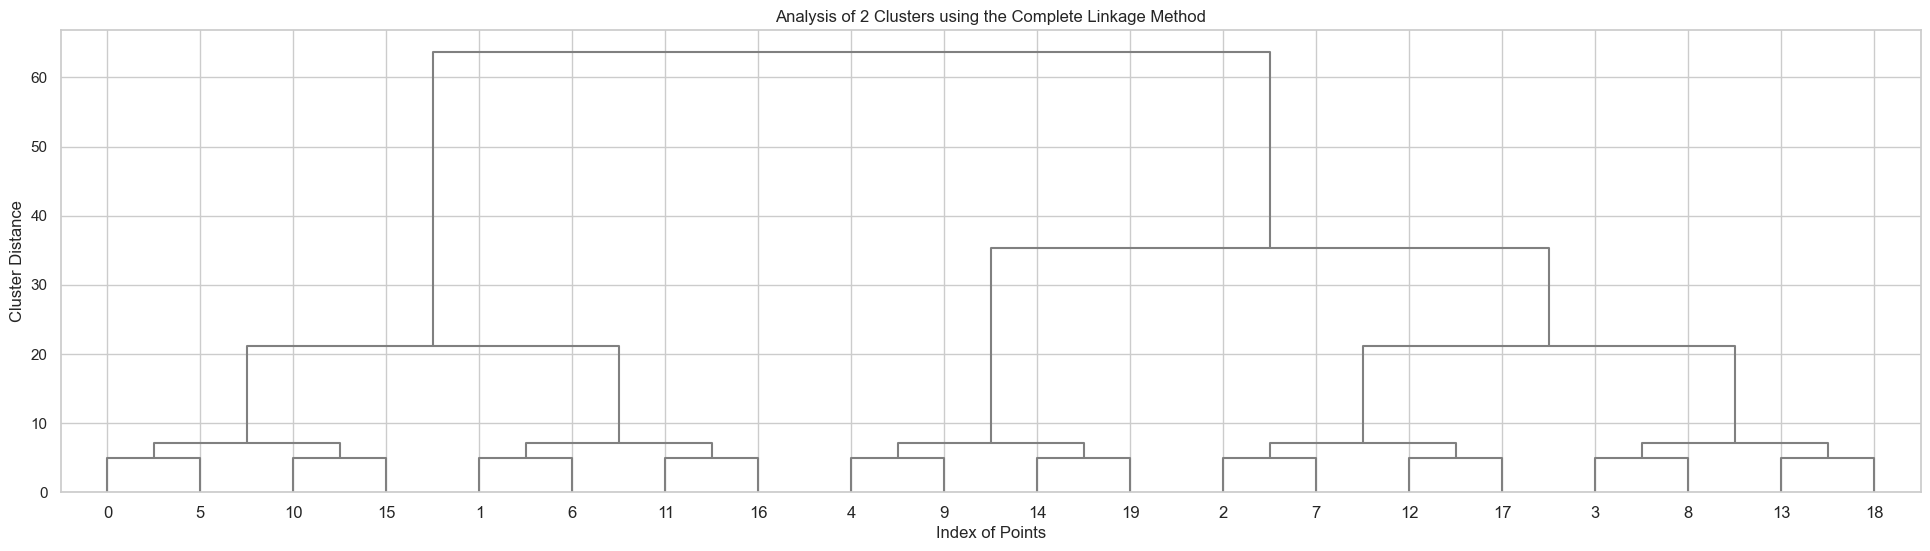

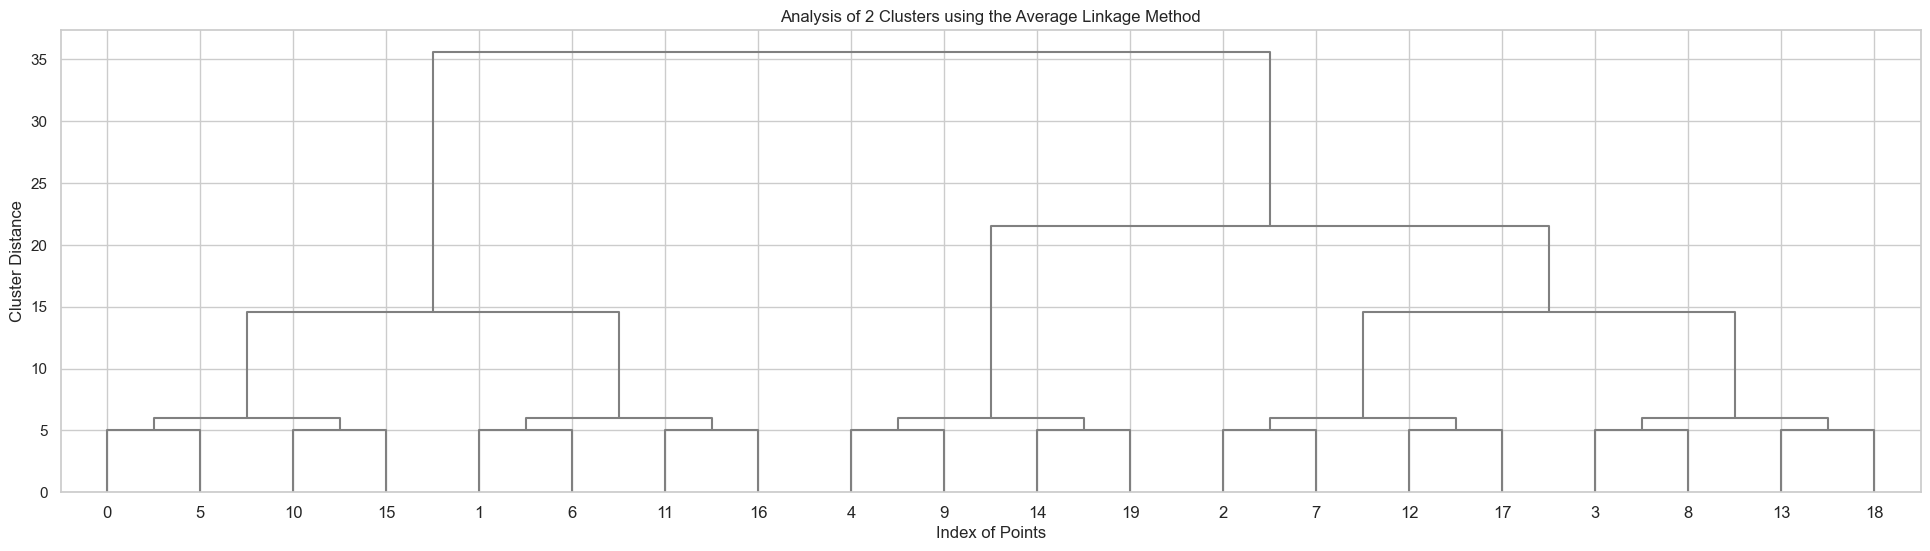

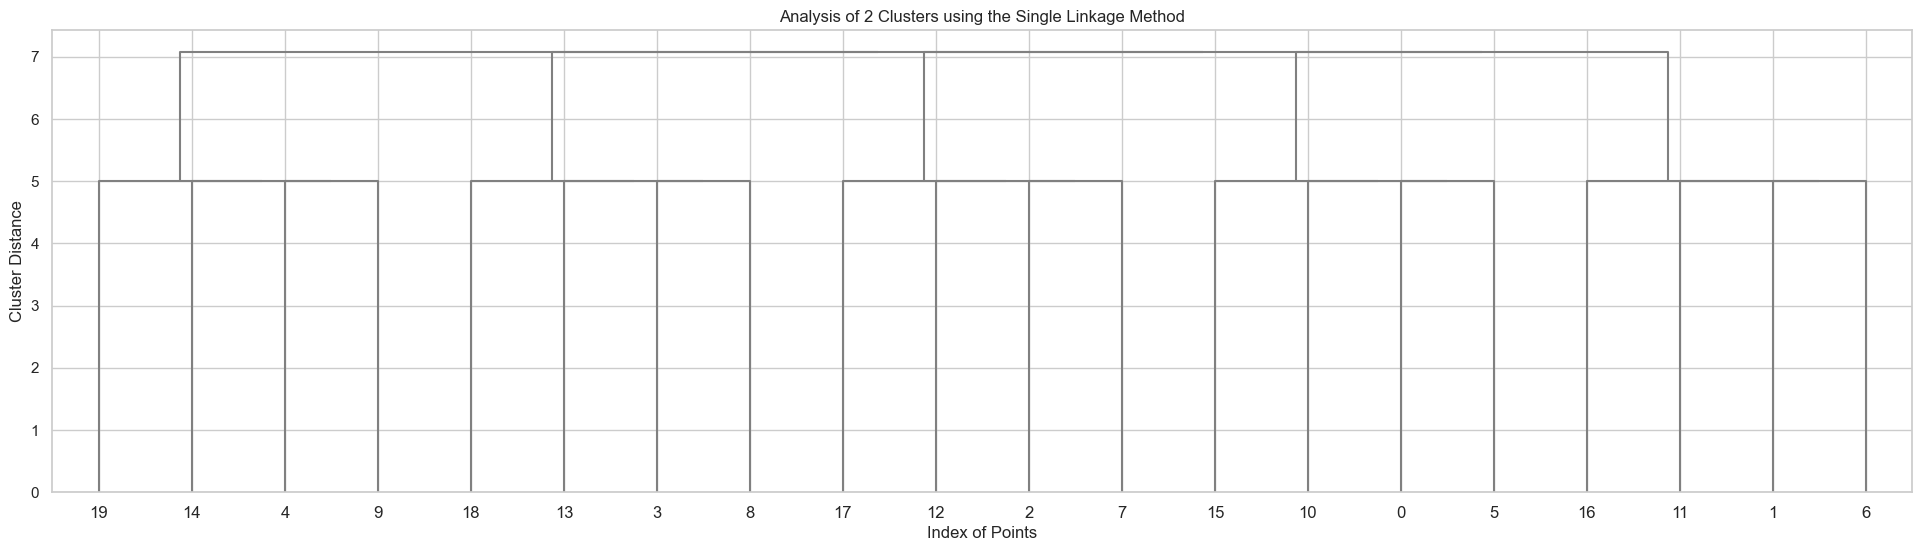

In [58]:
cluster_count = 2
linkage_options = ['ward', 'complete', 'average', 'single']


color_palette = 'viridis'
for linkage_type in linkage_options:
    linkage_matrix = hierarchy.linkage(X, method=linkage_type)
    
    plt.figure(figsize=(24, 6))  
    dendro_plot = hierarchy.dendrogram(linkage_matrix, color_threshold=1.5, above_threshold_color='grey')
    plt.title(f'Analysis of {cluster_count} Clusters using the {linkage_type.capitalize()} Linkage Method')
    plt.xlabel('Index of Points')
    plt.ylabel('Cluster Distance')
    plt.grid(True)  
    plt.show()
